# Heart Failure Prediction Dataset
https://www.kaggle.com/fedesoriano/heart-failure-prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

heart = pd.read_csv('./data/heart.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


1. Age: 나이(년)
2. Sex: 성별(M:남자, F:여자)
3. ChestPainType: 가슴 통증 종류(TA: Typical Angina(전형적 협심증), ATA: Atypical Angina(비전형적 흉통), NAP: Non-Anginal Pain(비협심증 흉통), ASY: Asymptomatic(무증상)) - [anginal pain (협심증)](https://blog.naver.com/swseungwoo/222197288576)
4. RestingBP: 안정 혈압(mmHg)
5. Cholesterol: 혈청 콜레스테롤(mm/dl)
6. FastingBS: 공복혈당(1: if FastingBS > 120 mg/dl, 0: otherwise)
7. RestingECG: 휴식 중 심전도(Normal: 보통, ST: ST-T파에 이상이 있음 (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: Estes' criteria에 의해 좌심실대비증이 의심되거나 확실한 경우)
8. MaxHR: 최대 심박수(60과 202 사이의 수치형 변수)
9. ExerciseAngina: 운동성 협심증(Y: Yes, N: No)
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]  
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]  
12. HeartDisease: output class [1: heart disease, 0: Normal]

In [2]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [3]:
heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## EDA

### 나이

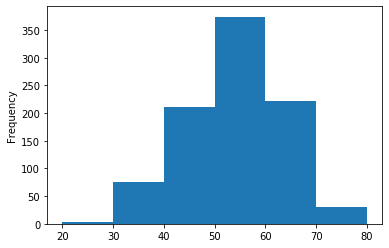

In [4]:
age = heart['Age']
age.plot.hist(rot=0, bins=6, range=(age.min()//10*10, (age.max()//10+1)*10))
plt.show()

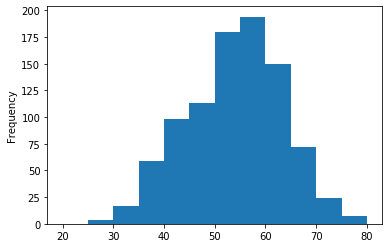

In [5]:
age.plot.hist(rot=0, bins=12, range=(age.min()//10*10, (age.max()//10+1)*10))
plt.show()

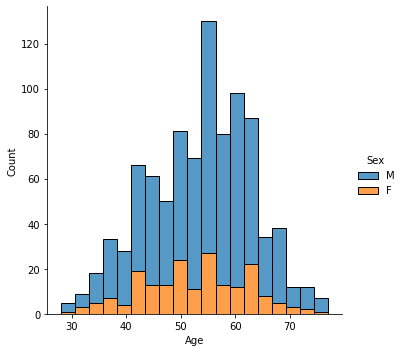

In [6]:
sns.displot(heart, x='Age', hue='Sex', multiple="stack")
plt.show()

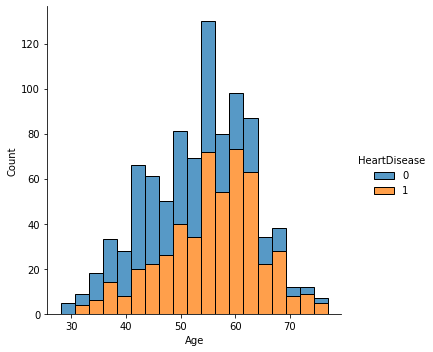

In [7]:
sns.displot(heart, x='Age', hue='HeartDisease', multiple="stack")
plt.show()

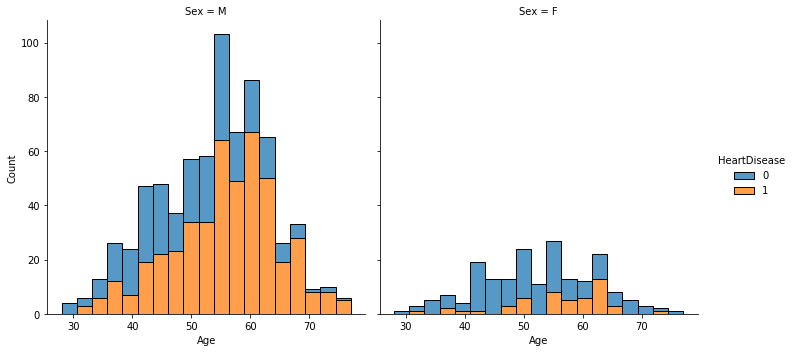

In [8]:
sns.displot(heart, x='Age', col='Sex', hue='HeartDisease', multiple="stack")
plt.show()

### 성별

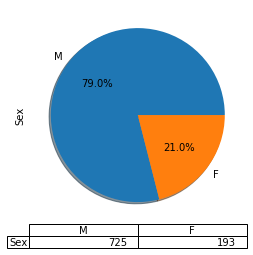

In [9]:
sex = heart['Sex'].value_counts()
sex.plot.pie(autopct='%.1f%%', shadow=True, table=True)
plt.show()

In [10]:
sex2 = heart.groupby(['HeartDisease', 'Sex'])['Age'].count().reset_index()
sex2

,HeartDisease,Sex,Age
0,0,F,143
1,0,M,267
2,1,F,50
3,1,M,458


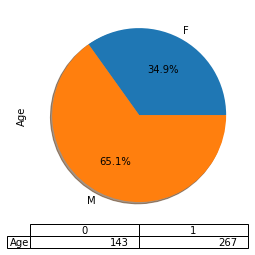

In [11]:
# 심부전 환자가 아닌 사람
sex2[sex2['HeartDisease']==0]['Age'].plot.pie(autopct='%.1f%%', shadow=True, table=True, labels=['F', 'M'])
plt.show()

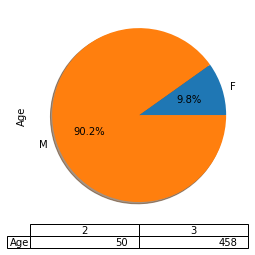

In [12]:
# 심부전 환자
sex2[sex2['HeartDisease']==1]['Age'].plot.pie(autopct='%.1f%%', shadow=True, table=True, labels=['F', 'M'])
plt.show()

#### 성별이 심부전과 연관이 있는지 카이제곱검정

In [13]:
from scipy.stats import chi2_contingency

pivot = pd.pivot_table(data=heart, index='HeartDisease', columns='Sex', values='Age', aggfunc='count')
pivot

Sex,F,M
HeartDisease,,
0,143,267
1,50,458


In [14]:
chi2, p, dof, ex = chi2_contingency(pivot)

def print_result(p):
    if p < 0.05:
        print(f'p-value={p:.4f} < 0.05이므로 귀무가설 기각')
    else:
        print(f'p-value={p:.4f} >= 0.05이므로 귀무가설을 기각할 수 없음')

print_result(p)

p-value=0.0000 < 0.05이므로 귀무가설 기각


독립성 검정에서 귀무가설(변수 간 독립이다) 기각 = 변수 간 연관성이 있다.

#### 나이와 심부전이 연관이 있는지 카이제곱검정
나이를 나이대로 바꿔 범주형 변수화

In [15]:
ageband = heart.copy()
ageband['Ageband'] = ageband['Age'].apply(lambda x:x//10 * 10)
ageband.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Ageband
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,40
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,40
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,30
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,40
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,50


In [16]:
pivot = pd.pivot_table(data=ageband, index='HeartDisease', columns='Ageband', values='Age', aggfunc='count')
pivot

Ageband,20,30,40,50,60,70
HeartDisease,,,,,,
0,4.0,50.0,126.0,162.0,59.0,9.0
1,NaN,26.0,85.0,212.0,163.0,22.0


In [17]:
pivot.fillna(0, inplace=True)
pivot

Ageband,20,30,40,50,60,70
HeartDisease,,,,,,
0,4.0,50.0,126.0,162.0,59.0,9.0
1,0.0,26.0,85.0,212.0,163.0,22.0


In [18]:
chi2, p, _, _ = chi2_contingency(pivot)

print_result(p)

p-value=0.0000 < 0.05이므로 귀무가설 기각


성별과 마찬가지로 나이대도 심부전과 연관이 있음

### 혈압

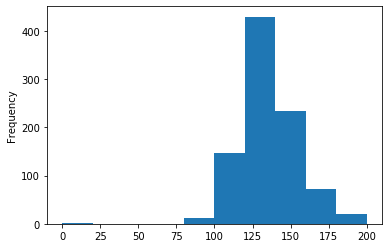

In [19]:
bp = heart['RestingBP']
bp.plot.hist()
plt.show()

In [20]:
bp[bp < 25]

449    0
Name: RestingBP, dtype: int64

결측치 혹은 이상치이므로 제외할 필요가 있어보임

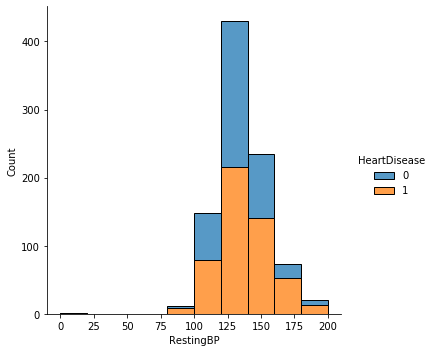

In [21]:
sns.displot(data=heart, x='RestingBP', hue='HeartDisease', multiple='stack', bins=10)
plt.show()

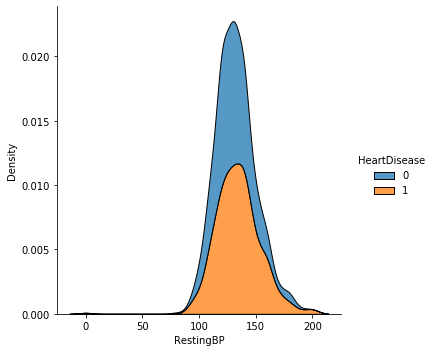

In [22]:
sns.displot(data=heart, x='RestingBP', hue='HeartDisease', multiple='stack', kind='kde')
plt.show()

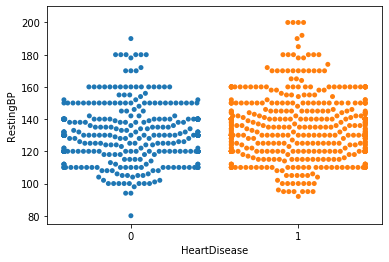

In [23]:
import warnings
warnings.filterwarnings('ignore')

sns.swarmplot(data=heart, x='HeartDisease', y='RestingBP')
plt.ylim((75, 210))
plt.show()

### 콜레스테롤

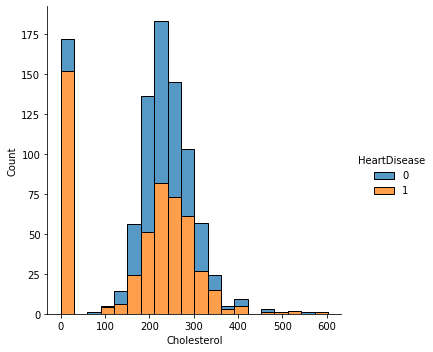

In [24]:
sns.displot(heart, x='Cholesterol', hue='HeartDisease', multiple='stack', bins=20)
plt.show()

#### 나이대별 혈압, 콜레스테롤 차이

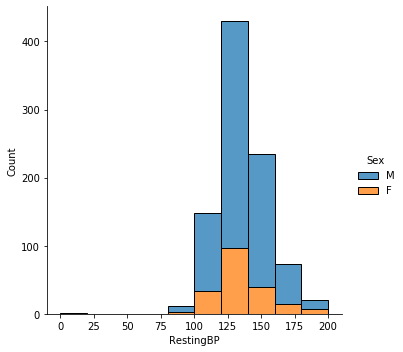

In [25]:
sns.displot(data=heart, x='RestingBP', hue='Sex', multiple='stack', bins=10)
plt.show()

In [26]:
from scipy.stats import ttest_ind

# 혈압
bp_m = heart[heart['Sex']=='M']['RestingBP']
bp_f = heart[heart['Sex']=='F']['RestingBP']

t, p = ttest_ind(bp_m, bp_f)

print_result(p)

p-value=0.8766 >= 0.05이므로 귀무가설을 기각할 수 없음


성별에 따른 혈압의 평균 차이는 없음

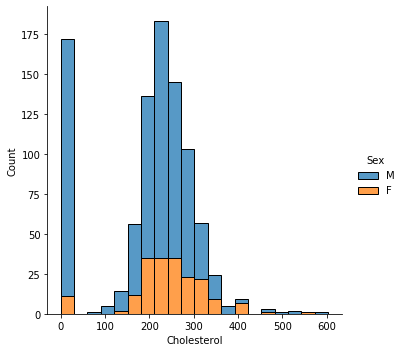

In [27]:
sns.displot(heart, x='Cholesterol', hue='Sex', multiple='stack', bins=20)
plt.show()

In [28]:
# 콜레스테롤
ch_m = heart[heart['Sex']=='M']['Cholesterol']
ch_f = heart[heart['Sex']=='F']['Cholesterol']

t, p = ttest_ind(ch_m, ch_f)

print_result(p)

p-value=0.0000 < 0.05이므로 귀무가설 기각


성별에 따른 콜레스테롤 평균 차이는 존재

In [29]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 혈압
formula = 'RestingBP ~ C(Ageband)'
result = ols(formula, ageband).fit()
anova_result = anova_lm(result)
anova_result

,df,sum_sq,mean_sq,F,PR(>F)
C(Ageband),5.0,19125.805006,3825.161001,11.817656,4.289837e-11
Residual,912.0,295197.863839,323.681868,NaN,NaN


귀무가설 기각 >> 나이대에 따라 혈압의 차이가 있음

In [30]:
# 콜레스테롤
formula = 'Cholesterol ~ C(Ageband)'
result = ols(formula, ageband).fit()
anova_result = anova_lm(result)
anova_result

,df,sum_sq,mean_sq,F,PR(>F)
C(Ageband),5.0,1.849430e+05,36988.595438,3.127286,0.008325
Residual,912.0,1.078686e+07,11827.699718,NaN,NaN


귀무가설 기각 >> 나이대에 따라 콜레스테롤 차이가 있음

### 혈압과 콜레스테롤의 관계

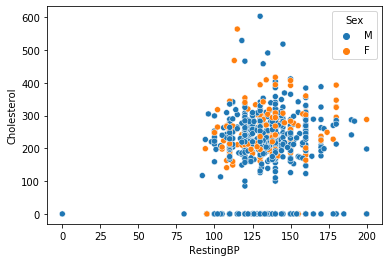

In [31]:
sns.scatterplot(data=ageband, x='RestingBP', y='Cholesterol', hue='Sex')
plt.show()

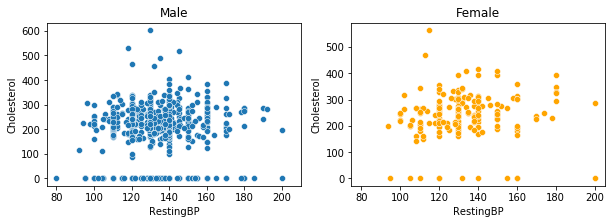

In [32]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
sns.scatterplot(data=ageband[ageband['Sex']=='M'], x='RestingBP', y='Cholesterol')
plt.xlim(75)
plt.title('Male')

plt.subplot(1, 2, 2)
sns.scatterplot(data=ageband[ageband['Sex']=='F'], x='RestingBP', y='Cholesterol', color='Orange')
plt.xlim(75)
plt.title('Female')

plt.show()

## 예측

In [33]:
heart_drop = heart.drop(index=449) # 혈압이 0이었던 이상치 제외
heart_drop.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [34]:
heart_ohe = pd.get_dummies(heart_drop)
heart_ohe.head(2)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0


In [35]:
heart_ohe.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [36]:
y = heart_ohe.pop('HeartDisease')
X = heart_ohe

X.shape, y.shape

((917, 20), (917,))

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.15, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=.2, random_state=0)

X_train.shape, X_val.shape, X_test.shape

((623, 20), (156, 20), (138, 20))

### 로지스틱 회귀
```python
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
```

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(fit_intercept=False)

params = {'tol':[0.001, 0.0001],
          'C':[0.1, 0.5, 1.0, 2.0]}

grid_lr = GridSearchCV(lr, param_grid=params, cv=5,
                       refit=True, return_train_score=True)

grid_lr.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_lr.cv_results_)
scores_df.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_tol,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
4,0.031516,0.001017,0.001596,0.000489,1.0,0.001,"{'C': 1.0, 'tol': 0.001}",0.832,0.872,0.808,...,0.855626,0.035196,1,0.869478,0.859438,0.873494,0.859719,0.855711,0.863568,0.006739
5,0.031316,0.001017,0.001796,0.000399,1.0,0.0001,"{'C': 1.0, 'tol': 0.0001}",0.832,0.872,0.808,...,0.855626,0.035196,1,0.869478,0.859438,0.873494,0.859719,0.855711,0.863568,0.006739
6,0.030518,0.000488,0.002194,0.000399,2.0,0.001,"{'C': 2.0, 'tol': 0.001}",0.832,0.864,0.800,...,0.852426,0.036798,3,0.875502,0.861446,0.871486,0.859719,0.851703,0.863971,0.008537
7,0.032313,0.000488,0.001596,0.000489,2.0,0.0001,"{'C': 2.0, 'tol': 0.0001}",0.832,0.864,0.800,...,0.852426,0.036798,3,0.875502,0.861446,0.871486,0.859719,0.851703,0.863971,0.008537
2,0.030518,0.000489,0.001596,0.000488,0.5,0.001,"{'C': 0.5, 'tol': 0.001}",0.832,0.872,0.800,...,0.852413,0.035029,5,0.871486,0.859438,0.875502,0.857715,0.853707,0.863570,0.008410


In [40]:
grid_lr.best_params_

{'C': 1.0, 'tol': 0.001}

In [41]:
grid_lr.best_score_

0.8556258064516129

In [42]:
grid_lr.best_estimator_.score(X_val, y_val)

0.8782051282051282

정확도: 0.8782, 정밀도: 0.8764, 재현율: 0.9070, f1 score: 0.8914, ROC_AUC score: 0.9369


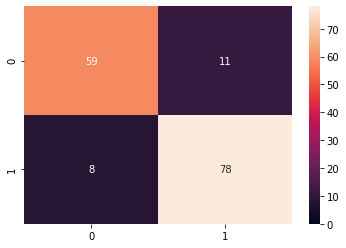

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

def get_scores(model, X, y):
    y_pred = model.predict(X)
    pred = model.predict_proba(X)[:, 1]
    
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    auc = roc_auc_score(y, pred)
    
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, f1 score: {f1:.4f}, ROC_AUC score: {auc:.4f}')
    
    con = confusion_matrix(y, y_pred)
    sns.heatmap(data=con, vmin=0, annot=True)
    plt.show()
    
get_scores(grid_lr.best_estimator_, X_val, y_val)

### 랜덤포레스트
```python
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
```

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=256)

params = {'max_depth':[None, 5, 7, 10, 15],
          'min_samples_split':[2, 3, 5],
          'min_samples_leaf':[1, 2, 4]}

grid_rf = GridSearchCV(rf_clf, param_grid=params, cv=5,
                       refit=True, return_train_score=True)
grid_rf.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_rf.cv_results_)
scores_df.sort_values(by='rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
38,0.121682,0.001409,0.010169,0.000401,15,1,5,"{'max_depth': 15, 'min_samples_leaf': 1, 'min_...",0.840,0.880,...,0.879729,0.034444,1,0.971888,0.973896,0.969880,0.963928,0.961924,0.968303,0.004614
2,0.120282,0.000802,0.010769,0.000399,None,1,5,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.840,0.880,...,0.879729,0.034444,1,0.971888,0.973896,0.969880,0.963928,0.961924,0.968303,0.004614
28,0.122068,0.001737,0.010172,0.000399,10,1,3,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.840,0.880,...,0.878103,0.029856,3,0.979920,0.983936,0.981928,0.977956,0.981964,0.981141,0.002037
20,0.117887,0.000746,0.010170,0.000397,7,1,5,"{'max_depth': 7, 'min_samples_leaf': 1, 'min_s...",0.832,0.880,...,0.876516,0.033899,4,0.947791,0.937751,0.945783,0.945892,0.933868,0.942217,0.005421
37,0.121679,0.001102,0.009970,0.000012,15,1,3,"{'max_depth': 15, 'min_samples_leaf': 1, 'min_...",0.840,0.872,...,0.876516,0.031956,4,0.991968,0.991968,0.995984,0.991984,0.991984,0.992778,0.001603


In [45]:
grid_rf.best_params_

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}

In [46]:
grid_rf.best_score_

0.8797290322580645

정확도: 0.8910, 정밀도: 0.8710, 재현율: 0.9419, f1 score: 0.9050, ROC_AUC score: 0.9488


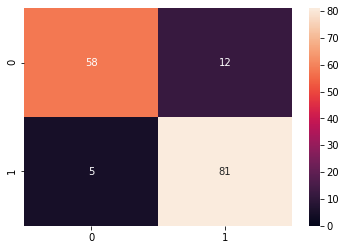

In [47]:
get_scores(grid_rf.best_estimator_, X_val, y_val)

### XGBoost
```
n_estimators : int
        Number of boosting rounds.
    use_label_encoder : bool
        (Deprecated) Use the label encoder from scikit-learn to encode the labels. For new
        code, we recommend that you set this parameter to False.

    max_depth : int
        Maximum tree depth for base learners.
    learning_rate : float
        Boosting learning rate (xgb's "eta")
    verbosity : int
        The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
    objective : string or callable
        Specify the learning task and the corresponding learning objective or
        a custom objective function to be used (see note below).
    booster: string
        Specify which booster to use: gbtree, gblinear or dart.
    tree_method: string
        Specify which tree method to use.  Default to auto.  If this parameter
        is set to default, XGBoost will choose the most conservative option
        available.  It's recommended to study this option from parameters
        document.
    n_jobs : int
        Number of parallel threads used to run xgboost.  When used with other Scikit-Learn
        algorithms like grid search, you may choose which algorithm to parallelize and
        balance the threads.  Creating thread contention will significantly slow down both
        algorithms.
    gamma : float
        Minimum loss reduction required to make a further partition on a leaf
        node of the tree.
    min_child_weight : float
        Minimum sum of instance weight(hessian) needed in a child.
    max_delta_step : float
        Maximum delta step we allow each tree's weight estimation to be.
    subsample : float
        Subsample ratio of the training instance.
    colsample_bytree : float
        Subsample ratio of columns when constructing each tree.
    colsample_bylevel : float
        Subsample ratio of columns for each level.
    colsample_bynode : float
        Subsample ratio of columns for each split.
    reg_alpha : float (xgb's alpha)
        L1 regularization term on weights
    reg_lambda : float (xgb's lambda)
        L2 regularization term on weights
    scale_pos_weight : float
        Balancing of positive and negative weights.
    base_score:
        The initial prediction score of all instances, global bias.
    random_state : int
        Random number seed.
```

In [48]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(random_state=0)

params = {'max_depth':[None, 5, 7, 10, 15],
          'min_child_weight':[2, 3, 5],
          'colsample_bytree':[0.5, 0.8, 1.0]
          }

grid_xgb = GridSearchCV(xgb_clf, param_grid=params, cv=5,
                       refit=True, return_train_score=True)
grid_xgb.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_xgb.cv_results_)
scores_df.sort_values(by='rank_test_score').head(5)

[15:05:21] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:05:21] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:05:21] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:05:21] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[15:05:23] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:05:23] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:05:23] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:05:23] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[15:05:25] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:05:25] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:05:25] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:05:25] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[15:05:27] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:05:27] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:05:27] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:05:27] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[15:05:29] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:05:29] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:05:29] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:05:29] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[15:05:31] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:05:31] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:05:31] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:05:31] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[15:05:33] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:05:33] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:05:33] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:05:33] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_max_depth,param_min_child_weight,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
7,0.050465,0.001017,0.003391,4.884609e-04,0.5,7,3,"{'colsample_bytree': 0.5, 'max_depth': 7, 'min...",0.856,0.864,...,0.866865,0.028584,1,0.997992,0.997992,0.991968,0.995992,0.993988,0.995586,0.002340
12,0.054654,0.001828,0.003192,3.990412e-04,0.5,15,2,"{'colsample_bytree': 0.5, 'max_depth': 15, 'mi...",0.856,0.856,...,0.858761,0.006120,2,0.997992,1.000000,0.997992,0.997996,0.997996,0.998395,0.000802
9,0.055252,0.003064,0.002992,1.507891e-07,0.5,10,2,"{'colsample_bytree': 0.5, 'max_depth': 10, 'mi...",0.856,0.856,...,0.858761,0.006120,2,0.997992,1.000000,0.997992,0.997996,0.997996,0.998395,0.000802
28,0.051861,0.001411,0.003192,3.991604e-04,0.8,15,3,"{'colsample_bytree': 0.8, 'max_depth': 15, 'mi...",0.856,0.856,...,0.857174,0.012498,4,0.997992,1.000000,0.995984,0.997996,0.997996,0.997994,0.001270
25,0.053058,0.001716,0.002992,6.306757e-04,0.8,10,3,"{'colsample_bytree': 0.8, 'max_depth': 10, 'mi...",0.856,0.856,...,0.857174,0.012498,4,0.997992,1.000000,0.995984,0.997996,0.997996,0.997994,0.001270


In [49]:
grid_xgb.best_params_

{'colsample_bytree': 0.5, 'max_depth': 7, 'min_child_weight': 3}

In [50]:
grid_xgb.best_score_

0.8668645161290323

정확도: 0.8782, 정밀도: 0.8851, 재현율: 0.8953, f1 score: 0.8902, ROC_AUC score: 0.9244


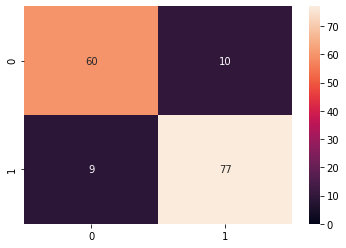

In [51]:
get_scores(grid_xgb.best_estimator_, X_val, y_val)

### LightGBM
```python
LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=100,
    subsample_for_bin=200000,
    objective=None,
    class_weight=None,
    min_split_gain=0.0,
    min_child_weight=0.001,
    min_child_samples=20,
    subsample=1.0,
    subsample_freq=0,
    colsample_bytree=1.0,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=None,
    n_jobs=-1,
    silent=True,
    importance_type='split',
    **kwargs,
)
```

In [52]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()

params = {'max_depth':[-1, 5, 7, 10, 15],
          'colsample_bytree':[0.5, 0.8, 1.0]}

grid_lgb = GridSearchCV(lgbm, param_grid=params, cv=5,
                       refit=True, return_train_score=True)
grid_lgb.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_lgb.cv_results_)
scores_df.sort_values(by='rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
3,0.031516,0.004068,0.002992,2.431402e-07,0.5,10,"{'colsample_bytree': 0.5, 'max_depth': 10}",0.856,0.864,0.832,...,0.868465,0.024741,1,1.000000,1.000000,0.997992,0.997996,0.995992,0.998396,0.001500
6,0.029521,0.001620,0.002992,6.309773e-04,0.8,5,"{'colsample_bytree': 0.8, 'max_depth': 5}",0.872,0.856,0.832,...,0.862000,0.018257,2,0.995984,0.991968,0.989960,0.991984,0.981964,0.990372,0.004637
2,0.029720,0.004009,0.002593,4.885972e-04,0.5,7,"{'colsample_bytree': 0.5, 'max_depth': 7}",0.848,0.864,0.832,...,0.860413,0.018961,3,0.997992,0.997992,0.993976,0.997996,0.995992,0.996790,0.001606
1,0.026928,0.001093,0.002992,3.504023e-07,0.5,5,"{'colsample_bytree': 0.5, 'max_depth': 5}",0.840,0.856,0.824,...,0.858839,0.027181,4,0.987952,0.989960,0.989960,0.981964,0.975952,0.985157,0.005457
8,0.036104,0.004820,0.002792,3.988744e-04,0.8,10,"{'colsample_bytree': 0.8, 'max_depth': 10}",0.840,0.864,0.832,...,0.858813,0.019583,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [53]:
grid_lgb.best_params_

{'colsample_bytree': 0.5, 'max_depth': 10}

In [54]:
grid_lgb.best_score_

0.8684645161290323

정확도: 0.8910, 정밀도: 0.8876, 재현율: 0.9186, f1 score: 0.9029, ROC_AUC score: 0.9259


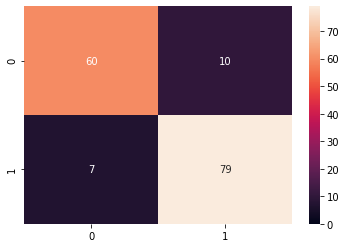

In [55]:
get_scores(grid_lgb.best_estimator_, X_val, y_val)

### 찾은 파라미터로 validation 데이터도 합친 뒤 학습, 평가

In [58]:
X_train_ = pd.concat([X_train, X_val])
y_train_ = pd.concat([y_train, y_val])
X_train_.shape, y_train_.shape

((779, 20), (779,))

========== LogisticRegression ==========
정확도: 0.8551, 정밀도: 0.8889, 재현율: 0.8421, f1 score: 0.8649, ROC_AUC score: 0.9412


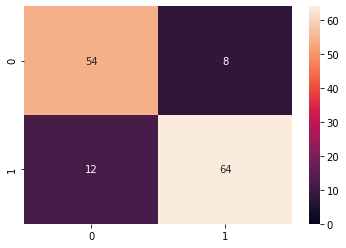

========== RandomForestClassifier ==========
정확도: 0.8696, 정밀도: 0.8919, 재현율: 0.8684, f1 score: 0.8800, ROC_AUC score: 0.9382


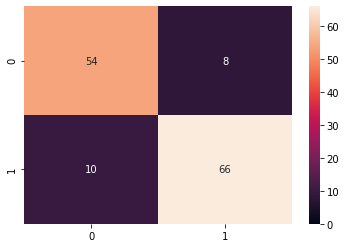

[15:05:54] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
========== XGBClassifier ==========
정확도: 0.8551, 정밀도: 0.9118, 재현율: 0.8158, f1 score: 0.8611, ROC_AUC score: 0.9340


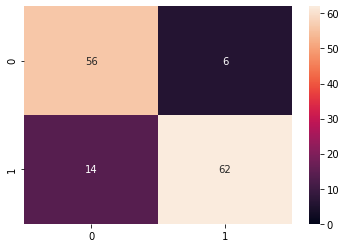

========== LGBMClassifier ==========
정확도: 0.8478, 정밀도: 0.8986, 재현율: 0.8158, f1 score: 0.8552, ROC_AUC score: 0.9240


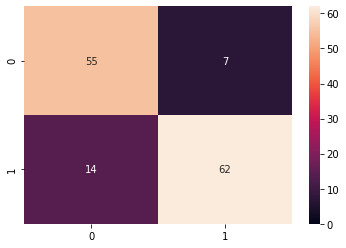

In [60]:
lr = LogisticRegression(fit_intercept=False, **grid_lr.best_params_)
rf = RandomForestClassifier(random_state=256, **grid_rf.best_params_)
xgb = XGBClassifier(**grid_xgb.best_params_)
lgb = LGBMClassifier(**grid_lgb.best_params_)

models = [lr, rf, xgb, lgb]
for model in models:
    model.fit(X_train_, y_train_)
    print('='*10, model.__class__.__name__, '='*10)
    get_scores(model, X_test, y_test)

## 분석

가장 성능이 좋은 랜덤포레스트를 분석

### feature_importances_

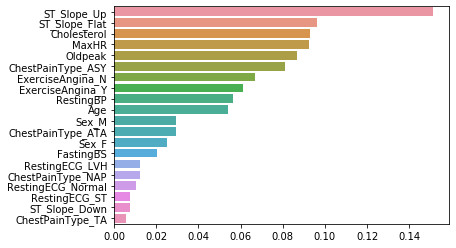

In [61]:
top20_features = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=top20_features.values, y=top20_features.index)
plt.show()

### Permutataion Importance

In [62]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0565 ± 0.0360,ST_Slope_Up
0.0217 ± 0.0275,ST_Slope_Flat
0.0188 ± 0.0148,Cholesterol
0.0159 ± 0.0108,RestingBP
0.0116 ± 0.0197,ChestPainType_ASY
0.0072 ± 0.0275,ExerciseAngina_Y
0.0072 ± 0.0000,ChestPainType_TA
0.0058 ± 0.0108,MaxHR
0.0043 ± 0.0148,FastingBS
0.0043 ± 0.0235,Oldpeak


### Partial Plots

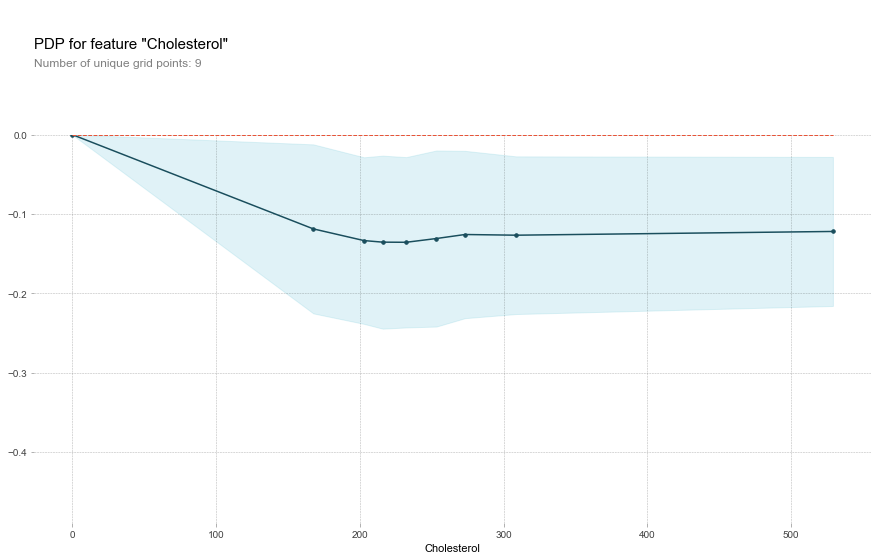

In [63]:
from pdpbox import pdp, get_dataset, info_plots

pdp_heart = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=X_test.columns, feature='Cholesterol')
pdp.pdp_plot(pdp_heart, 'Cholesterol')
plt.show()

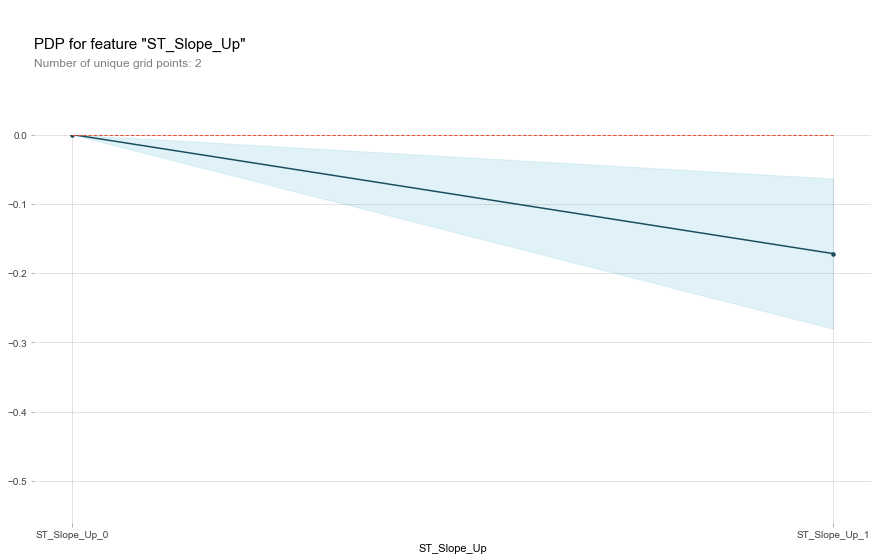

In [64]:
pdp_heart = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=X_test.columns, feature='ST_Slope_Up')
pdp.pdp_plot(pdp_heart, 'ST_Slope_Up')
plt.show()

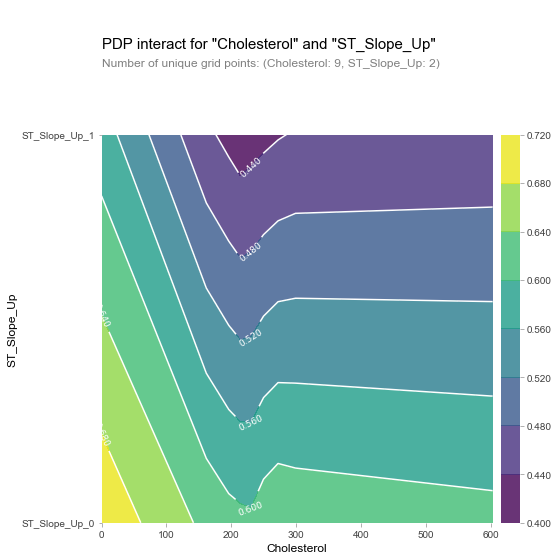

In [65]:
features_to_plot = ['Cholesterol', 'ST_Slope_Up']
inter1  =  pdp.pdp_interact(model=rf, dataset=X_train, model_features=X_test.columns, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

### SHAP values

In [66]:
y_test.iloc[2]

1

In [67]:
import shap

data_for_prediction = X_test.iloc[2]


explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(data_for_prediction)

shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

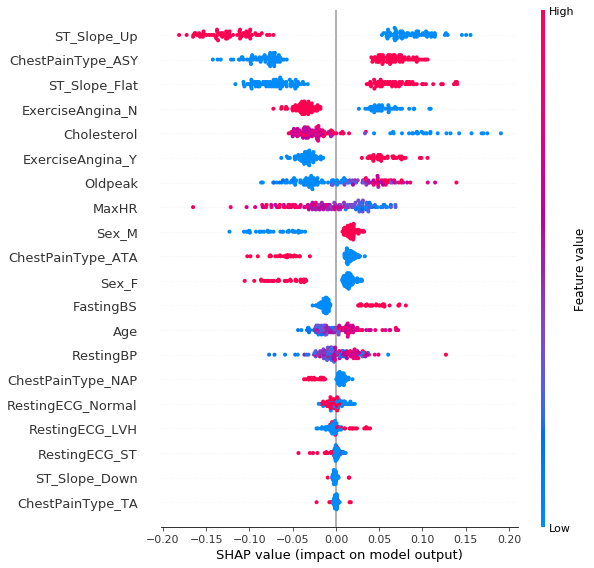

In [68]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)

**ST_Slope를 봤을 때** Up이면 음의 영향=심부전 위험도가 낮음, Flat이면 양의 영향=심부전 위험도가 높음  
**Sex를 봤을 때** 남자면 양의 영향=심부전 위험도가 높음, 여자면 음의 영향=심부전 위험도가 낮음

### DNN

In [69]:
from sklearn.preprocessing import MinMaxScaler

mscaler = MinMaxScaler()
mscaler.fit(X_train)
X_train_norm = mscaler.transform(X_train)
X_val_norm = mscaler.transform(X_val)

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train_norm.shape[1], )))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [71]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [72]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_accuracy',
                   mode='max',
                   patience=10,
                   verbose=1)

In [73]:
hist = model.fit(X_train_norm, y_train.values, epochs=100,
                 validation_data=(X_val_norm, y_val.values),
                 callbacks=[es])

Epoch 1/100
20/20 [==============================] - 1s 9ms/step - loss: 0.5976 - accuracy: 0.7512 - val_loss: 0.4868 - val_accuracy: 0.8526
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4196 - accuracy: 0.8475 - val_loss: 0.3451 - val_accuracy: 0.8526
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.3496 - accuracy: 0.8507 - val_loss: 0.3293 - val_accuracy: 0.8526
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3429 - accuracy: 0.8555 - val_loss: 0.3241 - val_accuracy: 0.8654
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3316 - accuracy: 0.8636 - val_loss: 0.3331 - val_accuracy: 0.8654
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3314 - accuracy: 0.8636 - val_loss: 0.3266 - val_accuracy: 0.8526
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3174 - accuracy: 0.8684 - val_loss: 0.3336 - val_accuracy: 0.8590
Epoch 8/100
2

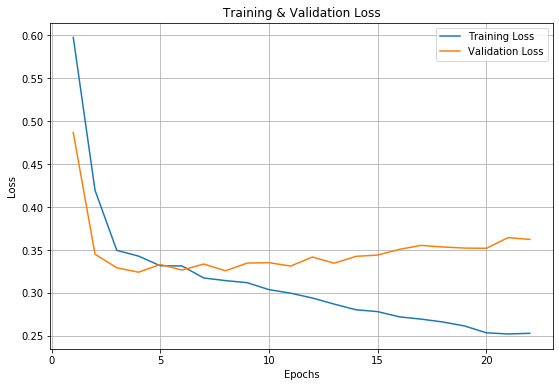

In [74]:
history = hist.history

epochs = range(1, len(history['loss']) + 1)

plt.figure(figsize=(9, 6))
plt.plot(epochs, history['loss'])
plt.plot(epochs, history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [75]:
# 드랍아웃 추가
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train_norm.shape[1], )))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train_norm, y_train.values, epochs=100,
                 validation_data=(X_val_norm, y_val.values))

Epoch 1/100
20/20 [==============================] - 1s 10ms/step - loss: 0.6821 - accuracy: 0.5634 - val_loss: 0.6359 - val_accuracy: 0.5962
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6410 - accuracy: 0.6100 - val_loss: 0.5647 - val_accuracy: 0.7821
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5771 - accuracy: 0.7191 - val_loss: 0.4805 - val_accuracy: 0.7949
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5471 - accuracy: 0.7400 - val_loss: 0.4113 - val_accuracy: 0.8718
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5284 - accuracy: 0.7624 - val_loss: 0.3800 - val_accuracy: 0.8782
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4688 - accuracy: 0.7913 - val_loss: 0.3453 - val_accuracy: 0.8718
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4547 - accuracy: 0.7881 - val_loss: 0.3331 - val_accuracy: 0.8782
Epoch 8/100


Epoch 59/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3309 - accuracy: 0.8764 - val_loss: 0.3246 - val_accuracy: 0.8782
Epoch 60/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3273 - accuracy: 0.8732 - val_loss: 0.3287 - val_accuracy: 0.8782
Epoch 61/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3117 - accuracy: 0.8716 - val_loss: 0.3282 - val_accuracy: 0.8782
Epoch 62/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3265 - accuracy: 0.8684 - val_loss: 0.3327 - val_accuracy: 0.8782
Epoch 63/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3137 - accuracy: 0.8796 - val_loss: 0.3263 - val_accuracy: 0.8718
Epoch 64/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3475 - accuracy: 0.8652 - val_loss: 0.3264 - val_accuracy: 0.8718
Epoch 65/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3243 - accuracy: 0.8796 - val_loss: 0.3245 - val_accuracy: 0.8654
Epoch 

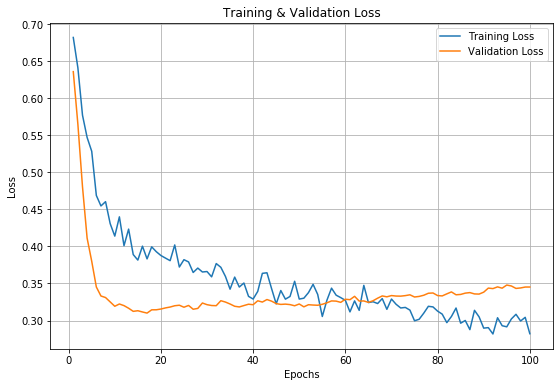

In [76]:
history = hist.history

epochs = range(1, len(history['loss']) + 1)

plt.figure(figsize=(9, 6))
plt.plot(epochs, history['loss'])
plt.plot(epochs, history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [78]:
from tensorflow.keras.layers import BatchNormalization, Activation

# 배치노말 추가
model = Sequential()
model.add(Dense(32, input_shape=(X_train_norm.shape[1], )))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train_norm, y_train.values, epochs=100,
                 validation_data=(X_val_norm, y_val.values))

Epoch 1/100
20/20 [==============================] - 1s 13ms/step - loss: 0.7887 - accuracy: 0.5506 - val_loss: 0.6481 - val_accuracy: 0.8269
Epoch 2/100
20/20 [==============================] - 0s 7ms/step - loss: 0.6668 - accuracy: 0.6051 - val_loss: 0.6118 - val_accuracy: 0.8654
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6075 - accuracy: 0.6870 - val_loss: 0.5805 - val_accuracy: 0.8718
Epoch 4/100
20/20 [==============================] - 0s 7ms/step - loss: 0.5919 - accuracy: 0.6774 - val_loss: 0.5396 - val_accuracy: 0.8718
Epoch 5/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5248 - accuracy: 0.7512 - val_loss: 0.4967 - val_accuracy: 0.8718
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5464 - accuracy: 0.7319 - val_loss: 0.4704 - val_accuracy: 0.8654
Epoch 7/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4777 - accuracy: 0.7785 - val_loss: 0.4307 - val_accuracy: 0.8654
Epoch 8/100


Epoch 59/100
20/20 [==============================] - 0s 5ms/step - loss: 0.3796 - accuracy: 0.8539 - val_loss: 0.3105 - val_accuracy: 0.8846
Epoch 60/100
20/20 [==============================] - 0s 5ms/step - loss: 0.3425 - accuracy: 0.8620 - val_loss: 0.3091 - val_accuracy: 0.8846
Epoch 61/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3844 - accuracy: 0.8491 - val_loss: 0.3105 - val_accuracy: 0.8846
Epoch 62/100
20/20 [==============================] - 0s 5ms/step - loss: 0.3801 - accuracy: 0.8571 - val_loss: 0.3158 - val_accuracy: 0.8782
Epoch 63/100
20/20 [==============================] - 0s 5ms/step - loss: 0.3385 - accuracy: 0.8604 - val_loss: 0.3150 - val_accuracy: 0.8782
Epoch 64/100
20/20 [==============================] - 0s 5ms/step - loss: 0.3477 - accuracy: 0.8539 - val_loss: 0.3148 - val_accuracy: 0.8782
Epoch 65/100
20/20 [==============================] - 0s 5ms/step - loss: 0.3538 - accuracy: 0.8571 - val_loss: 0.3129 - val_accuracy: 0.8782
Epoch 

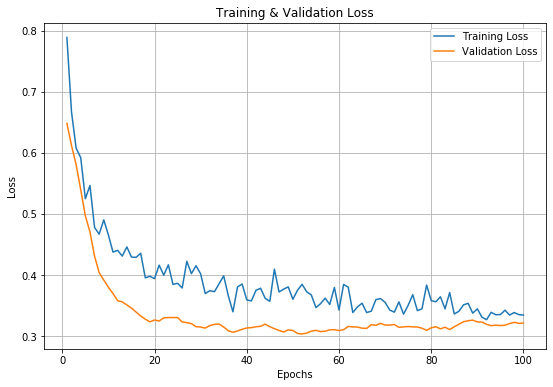

In [79]:
history = hist.history

epochs = range(1, len(history['loss']) + 1)

plt.figure(figsize=(9, 6))
plt.plot(epochs, history['loss'])
plt.plot(epochs, history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

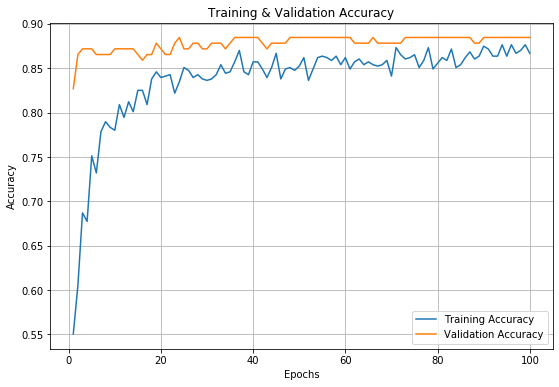

In [80]:
plt.figure(figsize=(9, 6))
plt.plot(epochs, history['accuracy'])
plt.plot(epochs, history['val_accuracy'])
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

In [81]:
# train+val

mscaler = MinMaxScaler()
mscaler.fit(X_train_)
X_train_norm_ = mscaler.transform(X_train_)
X_test_norm = mscaler.transform(X_test)

In [82]:
model = Sequential()
model.add(Dense(32, input_shape=(X_train_norm.shape[1], )))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train_norm, y_train.values, epochs=200,
                 validation_data=(X_val_norm, y_val.values))

Epoch 1/200
20/20 [==============================] - 1s 14ms/step - loss: 0.7033 - accuracy: 0.5891 - val_loss: 0.6124 - val_accuracy: 0.8397
Epoch 2/200
20/20 [==============================] - 0s 7ms/step - loss: 0.6137 - accuracy: 0.6806 - val_loss: 0.5716 - val_accuracy: 0.8397
Epoch 3/200
20/20 [==============================] - 0s 7ms/step - loss: 0.5860 - accuracy: 0.7014 - val_loss: 0.5248 - val_accuracy: 0.8397
Epoch 4/200
20/20 [==============================] - 0s 5ms/step - loss: 0.5449 - accuracy: 0.7223 - val_loss: 0.4837 - val_accuracy: 0.8590
Epoch 5/200
20/20 [==============================] - 0s 6ms/step - loss: 0.5291 - accuracy: 0.7448 - val_loss: 0.4477 - val_accuracy: 0.8590
Epoch 6/200
20/20 [==============================] - 0s 5ms/step - loss: 0.4986 - accuracy: 0.7833 - val_loss: 0.4170 - val_accuracy: 0.8462
Epoch 7/200
20/20 [==============================] - 0s 5ms/step - loss: 0.5136 - accuracy: 0.7480 - val_loss: 0.3891 - val_accuracy: 0.8462
Epoch 8/200


Epoch 59/200
20/20 [==============================] - 0s 6ms/step - loss: 0.3580 - accuracy: 0.8700 - val_loss: 0.3260 - val_accuracy: 0.8397
Epoch 60/200
20/20 [==============================] - 0s 5ms/step - loss: 0.3663 - accuracy: 0.8539 - val_loss: 0.3276 - val_accuracy: 0.8590
Epoch 61/200
20/20 [==============================] - 0s 5ms/step - loss: 0.3528 - accuracy: 0.8523 - val_loss: 0.3330 - val_accuracy: 0.8654
Epoch 62/200
20/20 [==============================] - 0s 6ms/step - loss: 0.4038 - accuracy: 0.8347 - val_loss: 0.3300 - val_accuracy: 0.8718
Epoch 63/200
20/20 [==============================] - 0s 5ms/step - loss: 0.3865 - accuracy: 0.8539 - val_loss: 0.3247 - val_accuracy: 0.8718
Epoch 64/200
20/20 [==============================] - 0s 6ms/step - loss: 0.3555 - accuracy: 0.8604 - val_loss: 0.3237 - val_accuracy: 0.8718
Epoch 65/200
20/20 [==============================] - 0s 6ms/step - loss: 0.3664 - accuracy: 0.8636 - val_loss: 0.3231 - val_accuracy: 0.8718
Epoch 

20/20 [==============================] - 0s 6ms/step - loss: 0.3513 - accuracy: 0.8716 - val_loss: 0.3425 - val_accuracy: 0.8654
Epoch 117/200
20/20 [==============================] - 0s 6ms/step - loss: 0.3278 - accuracy: 0.8716 - val_loss: 0.3438 - val_accuracy: 0.8654
Epoch 118/200
20/20 [==============================] - 0s 5ms/step - loss: 0.3478 - accuracy: 0.8555 - val_loss: 0.3427 - val_accuracy: 0.8654
Epoch 119/200
20/20 [==============================] - 0s 6ms/step - loss: 0.3519 - accuracy: 0.8652 - val_loss: 0.3450 - val_accuracy: 0.8654
Epoch 120/200
20/20 [==============================] - 0s 6ms/step - loss: 0.3240 - accuracy: 0.8748 - val_loss: 0.3462 - val_accuracy: 0.8718
Epoch 121/200
20/20 [==============================] - 0s 6ms/step - loss: 0.3136 - accuracy: 0.8796 - val_loss: 0.3507 - val_accuracy: 0.8654
Epoch 122/200
20/20 [==============================] - 0s 5ms/step - loss: 0.3316 - accuracy: 0.8684 - val_loss: 0.3483 - val_accuracy: 0.8718
Epoch 123/200

20/20 [==============================] - 0s 6ms/step - loss: 0.3131 - accuracy: 0.8876 - val_loss: 0.3646 - val_accuracy: 0.8718
Epoch 174/200
20/20 [==============================] - 0s 6ms/step - loss: 0.3254 - accuracy: 0.8684 - val_loss: 0.3580 - val_accuracy: 0.8782
Epoch 175/200
20/20 [==============================] - 0s 6ms/step - loss: 0.3241 - accuracy: 0.8764 - val_loss: 0.3583 - val_accuracy: 0.8782
Epoch 176/200
20/20 [==============================] - 0s 5ms/step - loss: 0.3131 - accuracy: 0.8844 - val_loss: 0.3606 - val_accuracy: 0.8782
Epoch 177/200
20/20 [==============================] - 0s 6ms/step - loss: 0.3204 - accuracy: 0.8604 - val_loss: 0.3583 - val_accuracy: 0.8782
Epoch 178/200
20/20 [==============================] - 0s 6ms/step - loss: 0.3156 - accuracy: 0.8780 - val_loss: 0.3555 - val_accuracy: 0.8718
Epoch 179/200
20/20 [==============================] - 0s 5ms/step - loss: 0.3079 - accuracy: 0.8748 - val_loss: 0.3545 - val_accuracy: 0.8782
Epoch 180/200

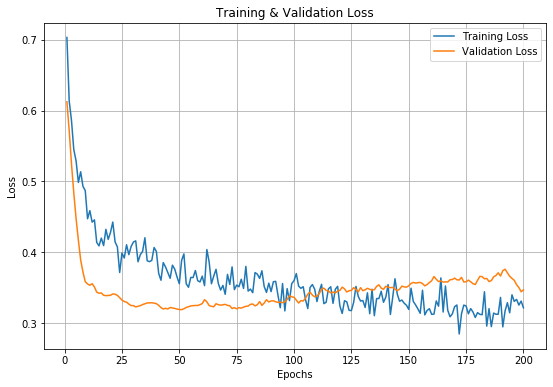

In [83]:
history = hist.history

epochs = range(1, len(history['loss']) + 1)

plt.figure(figsize=(9, 6))
plt.plot(epochs, history['loss'])
plt.plot(epochs, history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

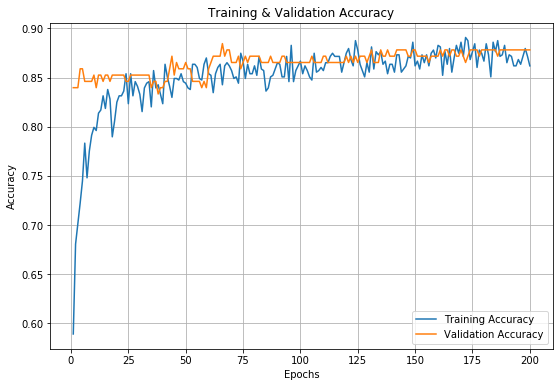

In [84]:
plt.figure(figsize=(9, 6))
plt.plot(epochs, history['accuracy'])
plt.plot(epochs, history['val_accuracy'])
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

In [85]:
model.evaluate(X_test_norm, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.8768


[0.3882039189338684, 0.8768116235733032]

In [86]:
pred = model.predict(X_test_norm)
pred[:5]

array([[0.08290605],
       [0.02185711],
       [0.92264134],
       [0.9636084 ],
       [0.00565396]], dtype=float32)

In [87]:
y_test[:5]

899    1
159    0
576    1
396    1
47     0
Name: HeartDisease, dtype: int64

In [88]:
y_pred = (pred > 0.5).astype(int)

정확도: 0.8768, 정밀도: 0.9041, 재현율: 0.8684, f1 score: 0.8859, ROC_AUC score: 0.9200


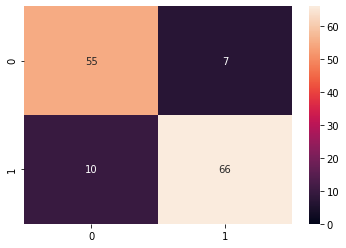

In [89]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, pred)

print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, f1 score: {f1:.4f}, ROC_AUC score: {auc:.4f}')

con = confusion_matrix(y_test, y_pred)
sns.heatmap(data=con, vmin=0, annot=True)
plt.show()